HW3 INTRO TO ML

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import datasets
from sklearn.datasets import load_breast_cancer

In [117]:
breast = load_breast_cancer()
breast_data = breast.data 
breast_data.shape

(569, 30)

In [118]:
breast_input = pd.DataFrame(breast_data) 
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [119]:
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels], axis = 1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names 

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

# Prob 1 Naïve Bayesian

In [120]:
# random state =60 gives highest accuracy, =0 gives lowest, =80 gives lower than =60
X_train, X_test, Y_train, Y_test = train_test_split(breast_input, breast_labels, train_size=0.8, test_size=0.2, random_state = 60)

In [121]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better
sc_X1 = StandardScaler()
X_train = sc_X1.fit_transform(X_train)
X_test = sc_X1.transform(X_test)

In [122]:
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [123]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.96      0.96      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[37  3]
 [ 3 71]]


Text(0.5, 427.9555555555555, 'Predicted label')

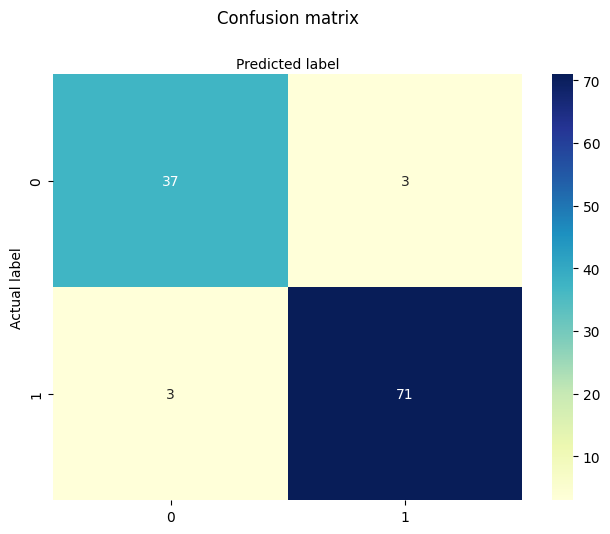

In [124]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
cnf_matrix = confusion_matrix(yTest,pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [125]:
# print all 3
print("Accuracy:",metrics.accuracy_score(yTest, pred)) 
print("Precision:",metrics.precision_score(yTest, pred)) 
print("Recall:",metrics.recall_score(yTest, pred)) 

Accuracy: 0.9473684210526315
Precision: 0.9594594594594594
Recall: 0.9594594594594594


# Prob 2 logistic & PCA 

In [126]:
# pca = PCA(n_components=8)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ])

In [127]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(breast_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10', 'PC 11'])
# n=11 gives the best accuracy

In [128]:
# pca = PCA(n_components=12) 
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents
# , columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11' ,'PC 12' ])

In [129]:
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11' ,'PC 12' , 'PC 13', 'PC 14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20'])

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, breast_labels, test_size = 0.2, random_state=60)

In [131]:
# scaling
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

In [132]:
# logistic regression
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [133]:
Y_pred = classifier.predict(X_test) 

In [134]:
# confusion matrix-
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix 

array([[39,  1],
       [ 2, 72]])

In [135]:
# print all 3
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973


Text(0.5, 427.9555555555555, 'Predicted label')

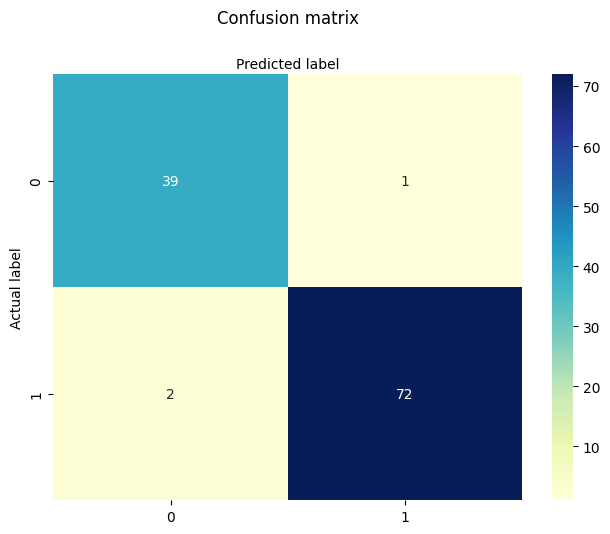

In [136]:
# plotting cnf
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)

# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout()
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Prob 3 Bayes classifier

In [147]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(breast_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ])

In [138]:
# pca = PCA(n_components=11)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11'])
# # n=11 gives the best accuracy

In [139]:
# pca = PCA(n_components=12) 
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents
# , columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11' ,'PC 12' ])

In [140]:
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11' ,'PC 12' , 'PC 13', 'PC 14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20'])

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, breast_labels, test_size = 0.2, random_state=60)

In [149]:
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

In [150]:
model=GaussianNB()
model.fit(X_train,Y_train)
print(model)

GaussianNB()


In [151]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[38  2]
 [ 2 72]]


Text(0.5, 427.9555555555555, 'Predicted label')

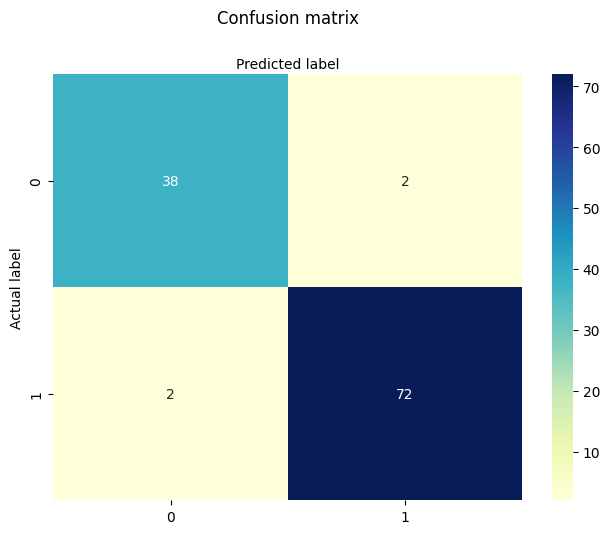

In [152]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
cnf_matrix = confusion_matrix(yTest,pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [153]:
# print all 3
print("Accuracy:",metrics.accuracy_score(yTest, pred)) 
print("Precision:",metrics.precision_score(yTest, pred)) 
print("Recall:",metrics.recall_score(yTest, pred)) 

Accuracy: 0.9649122807017544
Precision: 0.972972972972973
Recall: 0.972972972972973
